# Linear Regression:
## `Multiple Linear Regression`

> ### Step1: Read data

In [1]:
import pandas as pd
df = pd.read_csv("/Users/user/Desktop/python/datasets/50_Startups.csv")
df

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [2]:
df.corr()

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


**Best correlation is bw Profit and RND**


> ### Step 2: Data visualisation

In [3]:
df.shape

(50, 5)

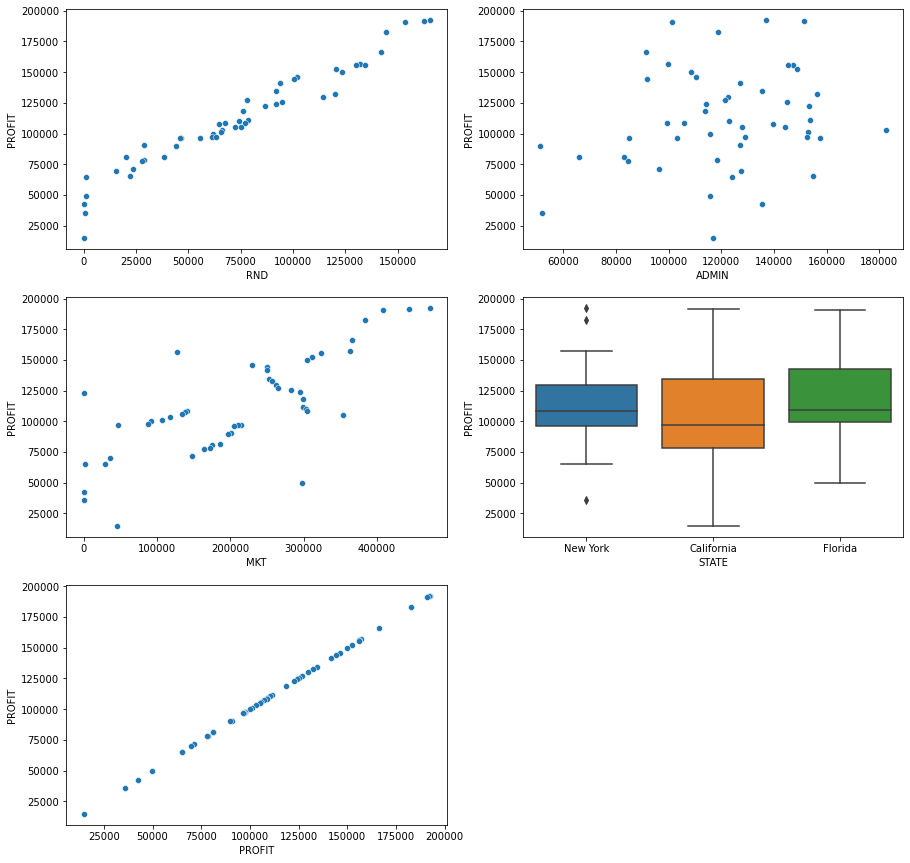

In [4]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
x = 1

for i in df.columns:
    if df[i].dtypes == "object":
        plt.subplot(3,2,x)
        sns.boxplot(df[i], df.PROFIT)
        x += 1
    else:
        plt.subplot(3,2,x)
        sns.scatterplot(df[i], df.PROFIT)
        x += 1
        

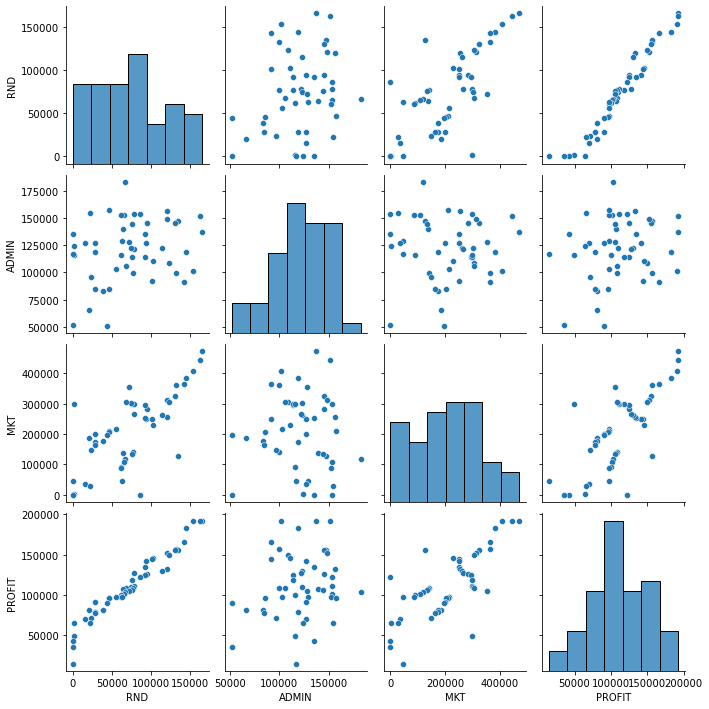

In [5]:
sns.pairplot(df)

In [6]:
df.isnull().sum()


RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

>### Step3: One Hot Encoding

In [7]:
df0=df
df0[["STATE"]]

,STATE
0,New York
1,California
2,Florida
3,New York
4,Florida
5,New York
6,California
7,Florida
8,New York
9,California


In [8]:
pd.get_dummies(df0.STATE)

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


>### Step4: Label Encoder

In [ ]:
df1=df[["RND", "MKT", "ADMIN", "STATE","PROFIT"]]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
state = le.fit_transform(df1['STATE'])
df1['NEW_STATE'] = state

In [ ]:
df1

> ### Step5: Ols Technique
###  `Forward Selection`

In [ ]:
X = df0[["RND"]]
Y = df0[["PROFIT"]]

In [ ]:

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)


In [ ]:
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain) # mandatory step, need to add a dummy column[needed so that we can get b0]
model = OLS(ytrain,xconst)
model.fit().summary()

In [ ]:

X = df0[["RND", "MKT"]]
Y = df0[["PROFIT"]]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain) # mandatory step, need to add a dummy column[needed so that we can get b0]
model = OLS(ytrain,xconst)
model.fit().summary()

In [ ]:

X = df0[["RND", "MKT", "ADMIN"]]
Y = df0[["PROFIT"]]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
from statsmodels.api import OLS,add_constant

xconst = add_constant(xtrain) # mandatory step, need to add a dummy column[needed so that we can get b0]
model = OLS(ytrain,xconst)
model.fit().summary()

In [ ]:

X = df0[["RND", "MKT", "ADMIN"]]
Y = df0[["PROFIT"]]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
from statsmodels.api import OLS,add_constant

xconst = add_constant(xtrain) # mandatory step, need to add a dummy column[needed so that we can get b0]
model = OLS(ytrain,xconst)
model.fit().summary()

In [ ]:

X = df0[["RND", "MKT", "ADMIN"]]
Y = df0[["PROFIT"]]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
from statsmodels.api import OLS,add_constant

xconst = add_constant(xtrain) # mandatory step, need to add a dummy column[needed so that we can get b0]
model = OLS(ytrain,xconst)
model.fit().summary()

### `Backward Elimination`

In [9]:

X = df0[["RND", "MKT", "ADMIN"]]
Y = df0[["PROFIT"]]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
from statsmodels.api import OLS,add_constant

xconst = add_constant(xtrain) # mandatory step, need to add a dummy column[needed so that we can get b0]
model = OLS(ytrain,xconst)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PROFIT   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     209.4
Date:                Sun, 24 Jul 2022   Prob (F-statistic):           7.77e-23
Time:                        17:48:06   Log-Likelihood:                -421.62
No. Observations:                  40   AIC:                             851.2
Df Residuals:                      36   BIC:                             858.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.676e+04   7107.174      6.580      0.000    3.23e+04    6.12e+04
RND            0.8069      0.049     16.305      0.000       0.707       0.907
MKT            0.0287      0.018      1.594      0.120      -0.008       0.065
ADMIN         -0.0002      0.058     -0.004      0.997      -0.118       0.118
==============================================================================
Omnibus:                       13.299   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.753
Skew:                          -0.950   Prob(JB):                     0.000140
Kurtosis:                       5.654   Cond. No.                     1.31e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:

X = df0[["RND", "MKT"]]
Y = df0[["PROFIT"]]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
from statsmodels.api import OLS,add_constant

xconst = add_constant(xtrain) # mandatory step, need to add a dummy column[needed so that we can get b0]
model = OLS(ytrain,xconst)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PROFIT   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     322.8
Date:                Sun, 24 Jul 2022   Prob (F-statistic):           3.80e-24
Time:                        17:49:04   Log-Likelihood:                -421.62
No. Observations:                  40   AIC:                             849.2
Df Residuals:                      37   BIC:                             854.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.674e+04   3306.959     14.134      0.000       4e+04    5.34e+04
RND            0.8068      0.045     17.874      0.000       0.715       0.898
MKT            0.0287      0.017      1.652      0.107      -0.007       0.064
==============================================================================
Omnibus:                       13.304   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.765
Skew:                          -0.950   Prob(JB):                     0.000139
Kurtosis:                       5.655   Cond. No.                     5.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> ### Step6: Model Creation

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(xtrain, ytrain)
tr_pr = model.predict(xtrain)
ts_pr = model.predict(xtest)

> ### Step7: Model Evaluation

In [12]:
from sklearn.metrics import mean_absolute_error
tr_er = mean_absolute_error(ytrain, tr_pr)
ts_er = mean_absolute_error(ytest, ts_pr)
print(f"Training MAE: {tr_er} \nTesting MAE: {ts_er}")

Training MAE: 6734.696630502678 
Testing MAE: 5916.047378112394


**Model is performing well.**